In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA

In [5]:
import numpy as np

data['TotalCharges'] = data['TotalCharges'].replace('', np.nan)
data['MonthlyCharges'] = data['MonthlyCharges'].replace('', np.nan)

data['MonthlyCharges'] = pd.to_numeric(data['MonthlyCharges'], errors='coerce')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [6]:
data.isnull().sum()/len(data) 

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
Churn               0.000000
dtype: float64

In [7]:
data = data.dropna(subset=['TotalCharges'])

In [8]:
data['TotalCharges'].isnull().sum()

np.int64(0)

In [9]:
data.duplicated().sum()

np.int64(0)

## Análisis Univariado Variables cuantitativas

In [10]:
numeric_data = data[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [11]:
from scipy.stats import skew, kurtosis, shapiro

def plot_numeric_distributions(data, numeric_cols):  
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)  

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        sk = skew(data[col].dropna())
        kt = kurtosis(data[col].dropna())
        _, p = shapiro(data[col].dropna())

        plt.subplot(rows, cols_per_row*2, idx*2-1)
        sns.histplot(data[col], kde=True, bins=20, color="skyblue")
        plt.title(f"{col}\nSkew: {sk:.2f}, Kurt: {kt:.2f}, p={p:.2g}")

        plt.subplot(rows, cols_per_row*2, idx*2)
        sns.boxplot(y=data[col], color="lightcoral", showmeans=True)
        plt.title(f"{col} - Boxplot")

    plt.tight_layout()
    plt.show()

/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  res = hypotest_fun_out(*samples, **kwds)
/Users/kanyewest/Documents/DataMiningTools/data-mining-tools-activities/venv/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7032.
  res = hypotest_fun_out(*samples, **kwds)


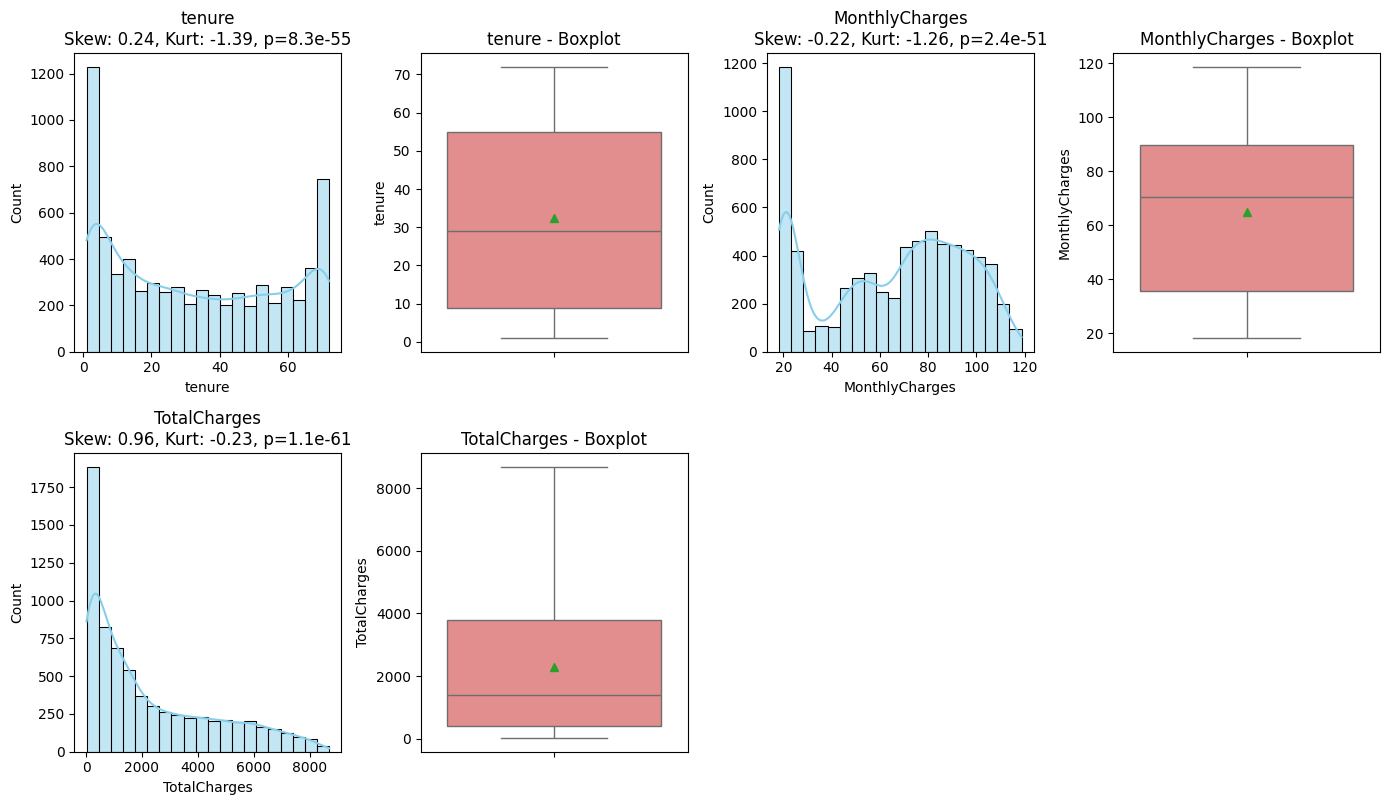

In [12]:
plot_numeric_distributions(data, numeric_data)

In [13]:
data.loc[data['TotalCharges']==data['MonthlyCharges'],'tenure'].describe()

count    613.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: tenure, dtype: float64

## Análisis Univariado Variables Cualitativas

In [14]:
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [15]:
def plot_categorical_distributions(data, categorical_cols):
    cols_per_row = 3
    n = len(categorical_cols)
    rows = -(-n // cols_per_row)  

    plt.figure(figsize=(cols_per_row * 6, rows * 4))

    for idx, col in enumerate(categorical_cols, 1):
        plt.subplot(rows, cols_per_row, idx)
        sns.countplot(data=data, x=col, hue=col, palette="Set2")
        plt.title(f"{col} Distribution")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

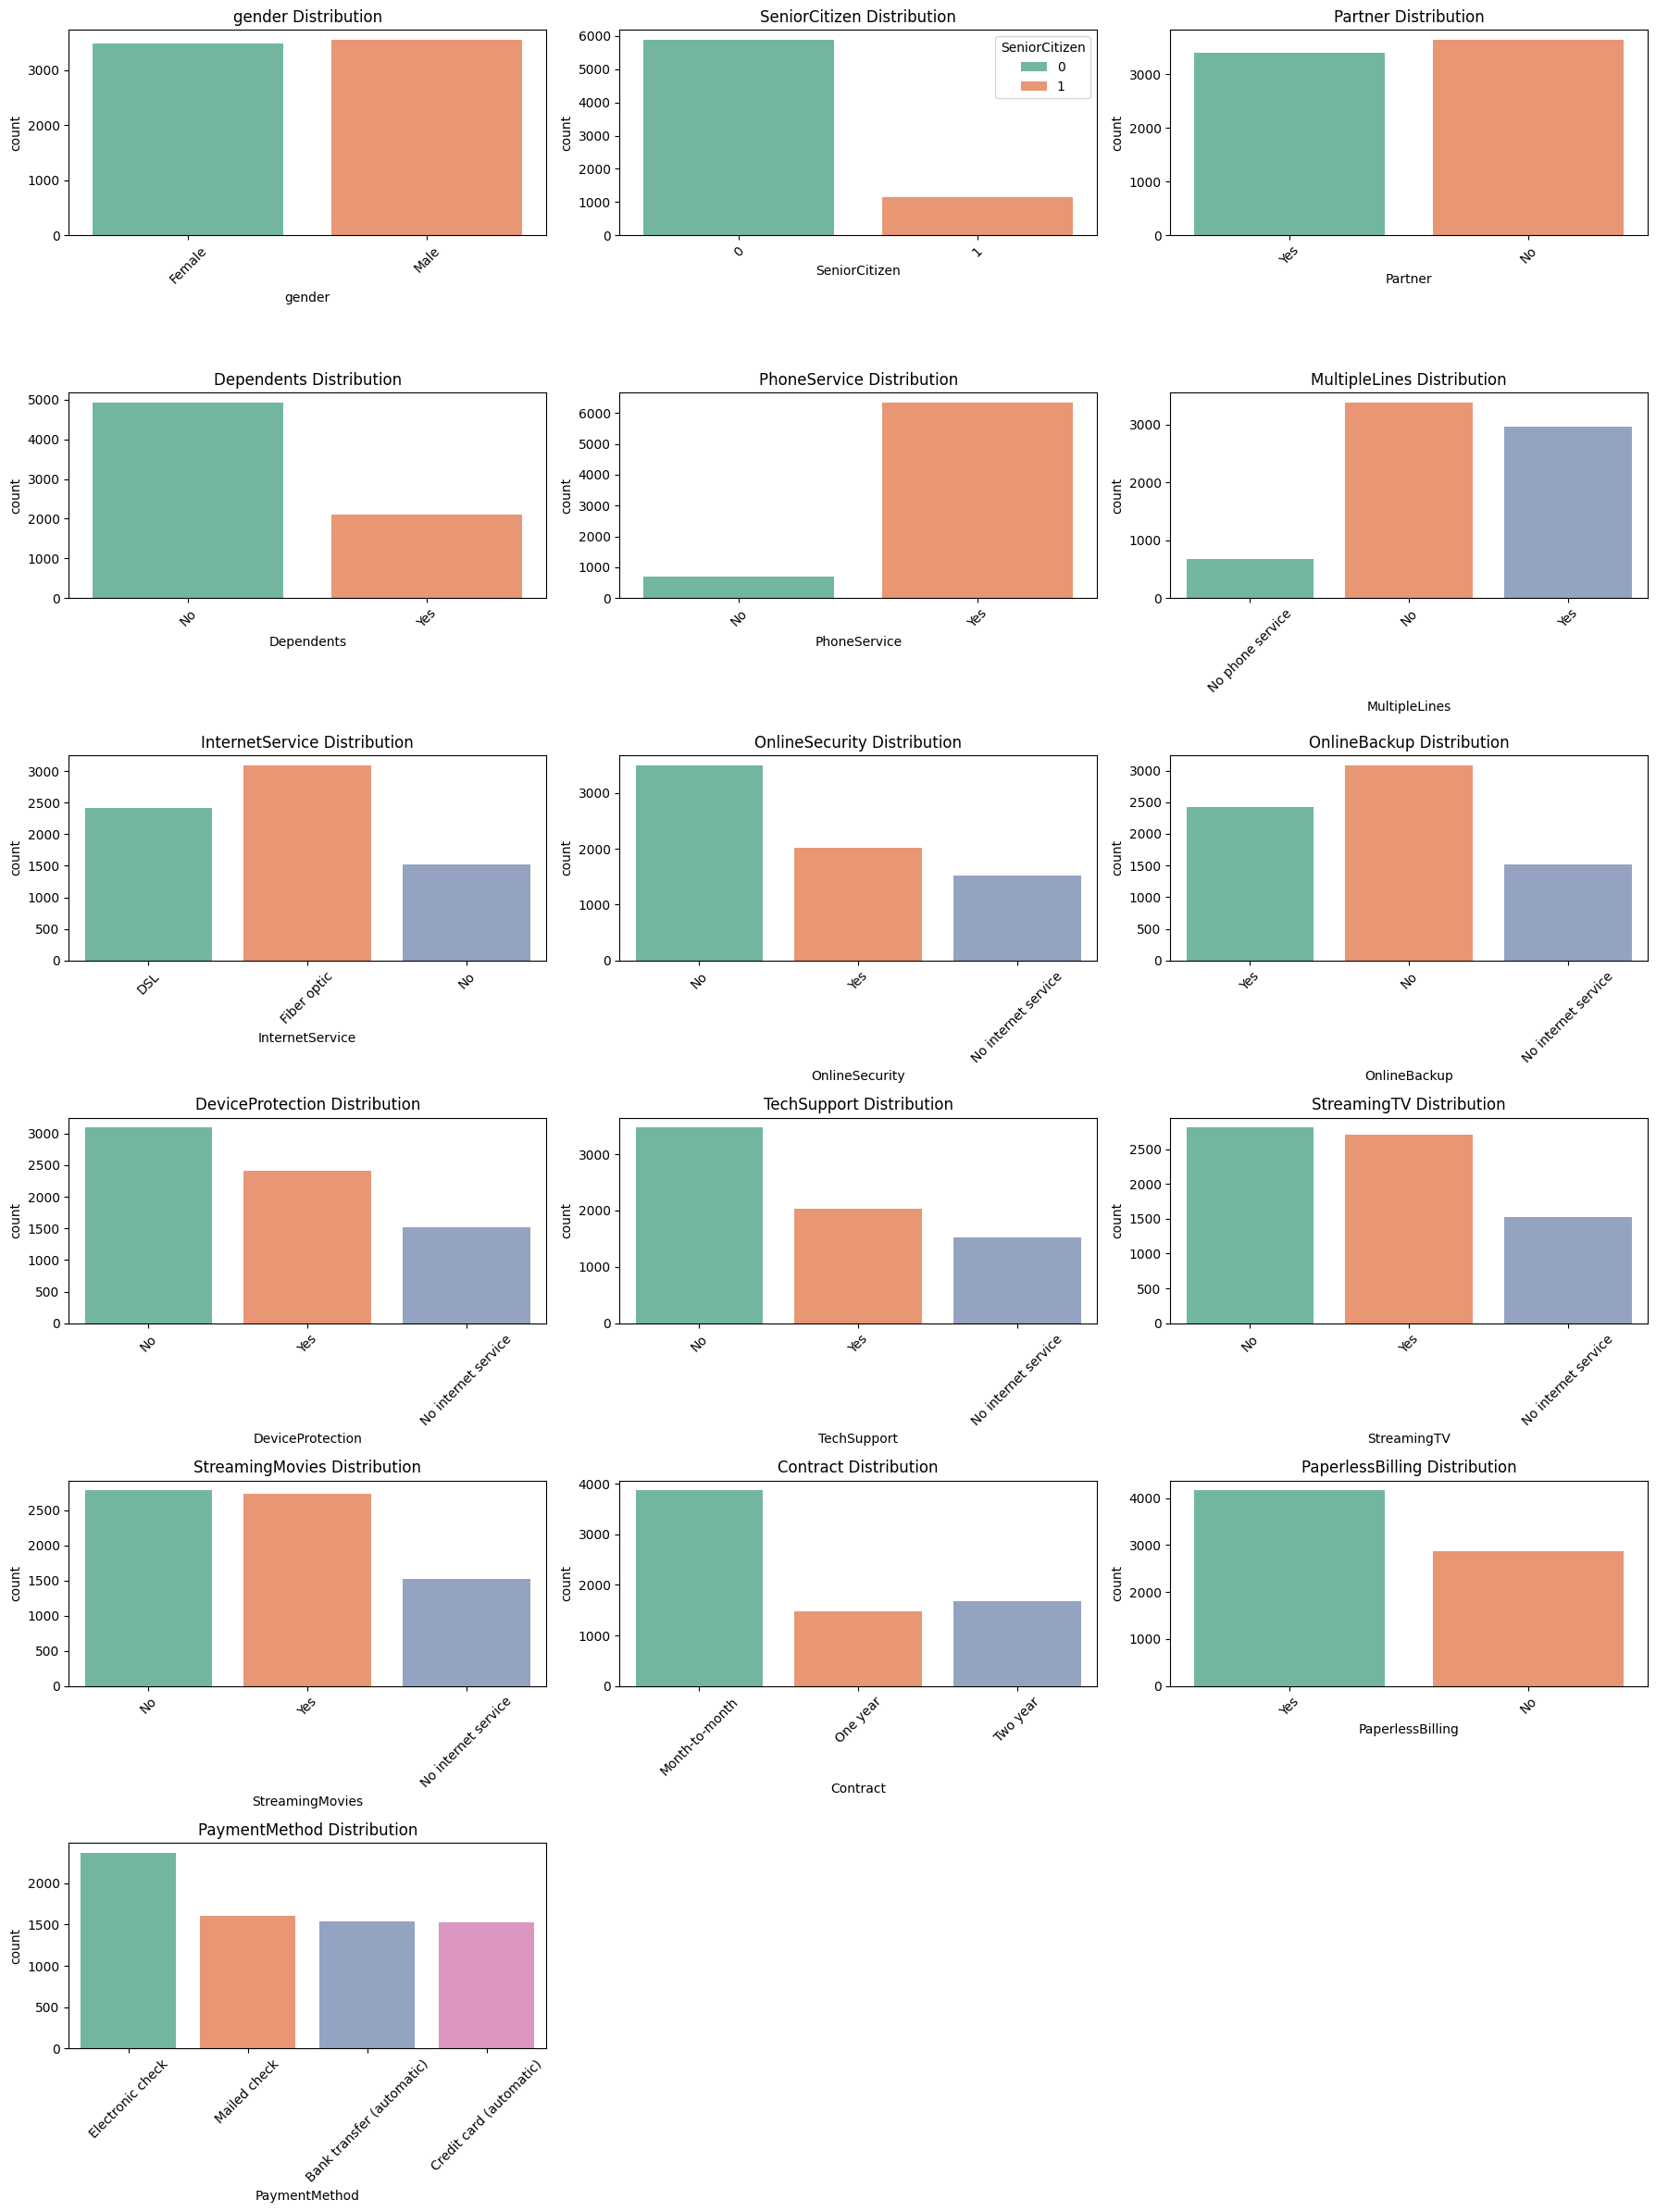

In [16]:
plot_categorical_distributions(data, categorical_cols)

### Distribución variable objetivo

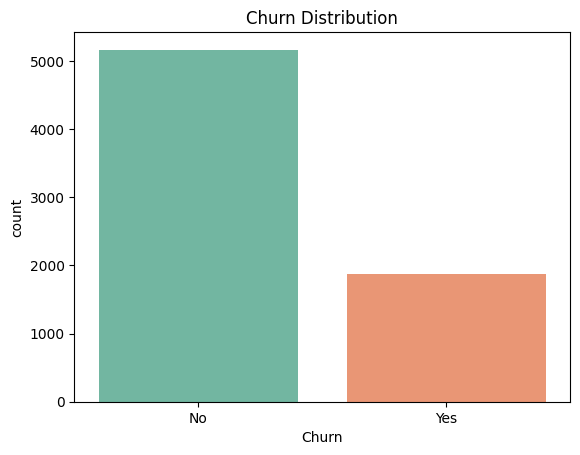

In [17]:
sns.countplot(data=data, x='Churn', hue='Churn', palette="Set2")
plt.title("Churn Distribution")
plt.show()

## Análisis Multivariado Cuantitativa - Cuantitativa

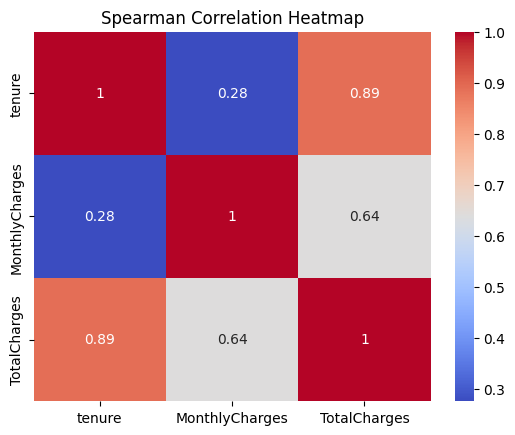

In [18]:
sns.heatmap(data[numeric_data.columns].corr('spearman'), annot=True, cmap='coolwarm')
plt.title("Spearman Correlation Heatmap")
plt.show()

In [19]:
from scipy.stats import spearmanr
import numpy as np

def get_spearman_pvalues(df):
    """Calcula matriz de p-valores para correlaciones de Spearman
        args: df (DataFrame): DataFrame con variables numéricas
        return: DataFrame con matriz de p-valores
    """
    cols = df.columns
    n = len(cols)
    p_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            if i == j:
                p_matrix[i, j] = 0  # Diagonal siempre 0
            else:
                # Eliminar NaN para el cálculo
                x = df.iloc[:, i].dropna()
                y = df.iloc[:, j].dropna()
                # Encontrar índices comunes (sin NaN en ambas variables)
                common_idx = df[[cols[i], cols[j]]].dropna().index
                if len(common_idx) > 2:
                    corr, p_val = spearmanr(df.loc[common_idx, cols[i]], 
                                          df.loc[common_idx, cols[j]])
                    p_matrix[i, j] = p_val
                else:
                    p_matrix[i, j] = np.nan
    
    return pd.DataFrame(p_matrix, index=cols, columns=cols)

# Calcular matriz de p-valores
p_values_spearman = get_spearman_pvalues(numeric_data)


def correlation_df(df, pval_matrix, method='spearman'):
    # Crear lista de pares únicos (sin repetir)
    corr_matrix = df.corr(method=method)
    pairs_data = []
    cols = df.columns
    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            var1, var2 = cols[i], cols[j]
            corr = corr_matrix.loc[var1, var2]
            p_val = pval_matrix.loc[var1, var2]
            
            # Clasificar fuerza de correlación
            abs_corr = abs(corr)
            if abs_corr < 0.1:
                fuerza = "Muy débil"
            elif abs_corr < 0.3:
                fuerza = "Débil"
            elif abs_corr < 0.5:
                fuerza = "Moderada"
            elif abs_corr < 0.7:
                fuerza = "Fuerte"
            else:
                fuerza = "Muy fuerte"
                
            pairs_data.append({
                'Par_Variables': f"{var1} ↔ {var2}",
                'Spearman_ρ': corr,
                'p-valor': p_val,
                'Significativo_α05': 'Sí' if p_val < 0.05 else 'No',
                'Fuerza': fuerza
            })

    # Crear DataFrame y ordenar por p-valor
    correlations_df = pd.DataFrame(pairs_data)
    correlations_df = correlations_df.sort_values('p-valor')

    # Redondear valores para mejor legibilidad
    correlations_df['Spearman_ρ'] = correlations_df['Spearman_ρ'].round(4)
    correlations_df['p-valor'] = correlations_df['p-valor'].round(6)

    display(correlations_df)


In [20]:
correlation_df(numeric_data, p_values_spearman, method='spearman')

,Par_Variables,Spearman_ρ,p-valor,Significativo_α05,Fuerza
1,tenure ↔ TotalCharges,0.8892,0.0,Sí,Muy fuerte
2,MonthlyCharges ↔ TotalCharges,0.6380,0.0,Sí,Fuerte
0,tenure ↔ MonthlyCharges,0.2753,0.0,Sí,Débil


## Análisis Mulitvariado Cualitativa-Cualitativa

In [21]:
from scipy.stats import chi2_contingency
import numpy as np

def realizar_pruebas_chi2_churn(data, variables_categoricas, target='Churn', alpha=0.05):
    """
    Realiza pruebas chi-cuadrado para variables categóricas vs Churn.
    Calcula V de Cramer como medida del tamaño del efecto.
    """
    resultados = []
    
    print("ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN")
    print("=" * 65)
    
    for variable in variables_categoricas:
        if variable == target:  # Skip the target variable itself
            continue
            
        # Crear tabla de contingencia
        tabla_contingencia = pd.crosstab(data[variable], data[target])
        
        # Realizar prueba chi-cuadrado
        chi2_stat, p_value, dof, expected = chi2_contingency(tabla_contingencia)
        
        # Calcular V de Cramer (medida del tamaño del efecto)
        n = tabla_contingencia.sum().sum()
        v_cramer = np.sqrt(chi2_stat / (n * (min(tabla_contingencia.shape) - 1)))
        
        # Interpretar V de Cramer
        if v_cramer < 0.1:
            efecto = "Muy débil"
        elif v_cramer < 0.3:
            efecto = "Débil"
        elif v_cramer < 0.5:
            efecto = "Moderado"
        else:
            efecto = "Fuerte"
        
        # Determinar si es significativo
        es_significativo = p_value < alpha
        
        # Guardar resultados
        resultado = {
            'Variable': variable,
            'Chi2_Estadistico': chi2_stat,
            'p_valor': p_value,
            'Grados_Libertad': dof,
            'V_Cramer': v_cramer,
            'Tamaño_Efecto': efecto,
            'Es_Significativo': 'Sí' if es_significativo else 'No',
            'Interpretacion': 'Rechazar H0 (hay asociación)' if es_significativo else 'No rechazar H0 (no hay asociación)'
        }
        resultados.append(resultado)
        
        # Mostrar resultados detallados para variables significativas con efecto moderado o fuerte
        if es_significativo and v_cramer >= 0.2:
            print(f"\n Variable: {variable}")
            print(f"   Chi² = {chi2_stat:.4f}")
            print(f"   p-valor = {p_value:.6f}")
            print(f"   V de Cramer = {v_cramer:.4f} ({efecto})")
            print(f"   Resultado: {resultado['Interpretacion']}")
            print(f"   Tabla de Contingencia:")
            # Mostrar tabla con porcentajes
            tabla_pct = pd.crosstab(data[variable], data[target], normalize='index') * 100
            print(tabla_pct.round(1))
            print("-" * 50)
    
    # Crear DataFrame con todos los resultados
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.sort_values('V_Cramer', ascending=False)
    
    return df_resultados

# Realizar las pruebas chi-cuadrado
resultados_chi2 = realizar_pruebas_chi2_churn(data, categorical_cols)

print("\n RESUMEN DE TODAS LAS VARIABLES:")
print("=" * 65)
display(resultados_chi2[['Variable', 'Chi2_Estadistico', 'p_valor', 'V_Cramer', 
                        'Tamaño_Efecto', 'Es_Significativo']].round(4))

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN

 Variable: InternetService
   Chi² = 728.6956
   p-valor = 0.000000
   V de Cramer = 0.3219 (Moderado)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn              No   Yes
InternetService            
DSL              81.0  19.0
Fiber optic      58.1  41.9
No               92.6   7.4
--------------------------------------------------

 Variable: OnlineSecurity
   Chi² = 846.6774
   p-valor = 0.000000
   V de Cramer = 0.3470 (Moderado)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn                  No   Yes
OnlineSecurity                 
No                   58.2  41.8
No internet service  92.6   7.4
Yes                  85.4  14.6
--------------------------------------------------

 Variable: OnlineBackup
   Chi² = 599.1752
   p-valor = 0.000000
   V de Cramer = 0.2919 (Débil)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn                  No   Yes


,Variable,Chi2_Estadistico,p_valor,V_Cramer,Tamaño_Efecto,Es_Significativo
13,Contract,1179.5458,0.0000,0.4096,Moderado,Sí
7,OnlineSecurity,846.6774,0.0000,0.3470,Moderado,Sí
10,TechSupport,824.9256,0.0000,0.3425,Moderado,Sí
6,InternetService,728.6956,0.0000,0.3219,Moderado,Sí
15,PaymentMethod,645.4299,0.0000,0.3030,Moderado,Sí
8,OnlineBackup,599.1752,0.0000,0.2919,Débil,Sí
9,DeviceProtection,555.8803,0.0000,0.2812,Débil,Sí
12,StreamingMovies,374.2684,0.0000,0.2307,Débil,Sí
11,StreamingTV,372.4565,0.0000,0.2301,Débil,Sí
14,PaperlessBilling,256.8749,0.0000,0.1911,Débil,Sí


Descartar Phone Service y Gender

In [22]:
def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table, correction=False)[0]
    n = table.to_numpy().sum()
    r, k = table.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - (k-1)*(r-1)/(n-1))
    rcorr = r - (r-1)**2/(n-1)
    kcorr = k - (k-1)**2/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


In [23]:
V = pd.DataFrame(index=categorical_cols, columns=categorical_cols)
for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        var1, var2 = categorical_cols[i], categorical_cols[j]
        v = cramers_v(data[var1], data[var2])
        V.loc[var1, var2] = v

In [24]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform

D = 1-V
Z = linkage(squareform(D.values, checks=False), method='average')
clusters = pd.Series(fcluster(Z, t=0.5, criterion='distance'), index=V.index)

v_target = {c: cramers_v(data[c], data['Churn']) for c in categorical_cols}
out = (pd.DataFrame({'cluster': clusters, 'v_target': pd.Series(v_target)})).sort_values(['cluster', 'v_target'], ascending=[True, False])

In [25]:
display(out)

,cluster,v_target
Partner,1,0.149518
Dependents,2,0.162703
Contract,3,0.409242
MultipleLines,4,0.036313
PhoneService,4,0.000000
OnlineSecurity,5,0.346607
TechSupport,5,0.342115
InternetService,5,0.321490
OnlineBackup,5,0.291435
DeviceProtection,5,0.280672


Debido a la alta asosiación entre Internet Service y sus variables hijas que hacen referencia a servicios. Se decidió quedarse con Internet Service y number of services

## Análisis Multivariado Cuantitativa-Cualitativa

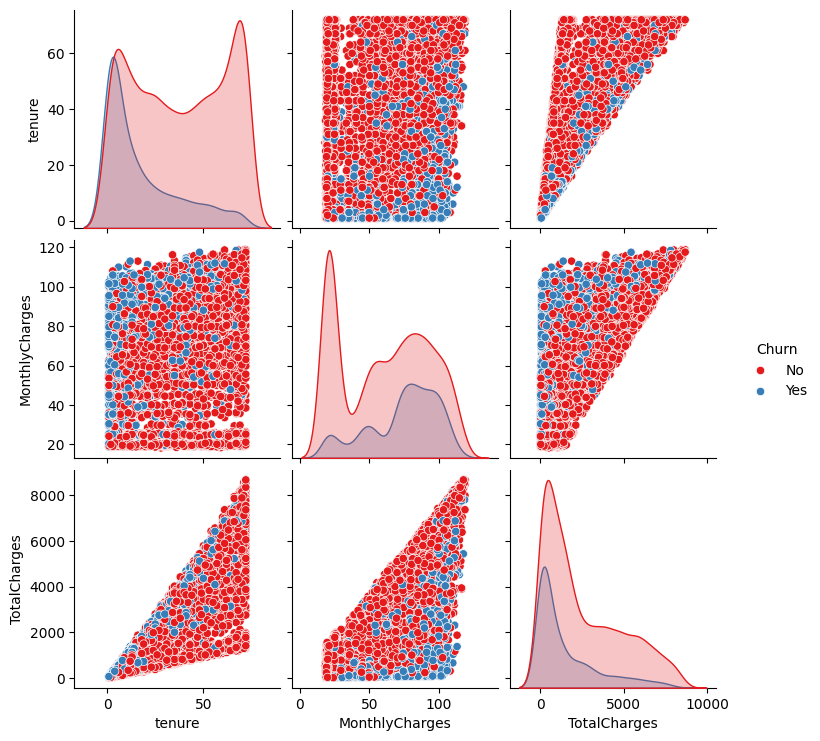

In [26]:
sns.pairplot(data=data, vars=numeric_data.columns, hue='Churn', palette='Set1')
plt.show()

In [27]:

def plot_numeric_distributions_by_target(data, target, numeric_cols):  
    cols_per_row = 2
    n = len(numeric_cols)
    rows = -(-n // cols_per_row)  

    plt.figure(figsize=(cols_per_row * 7, rows * 4))

    for idx, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols_per_row*2, idx)
        sns.boxplot(y=data[col], x=data[target], hue=data[target], palette="Set3", showmeans=True)
        plt.title(f"{col} by {target} - Boxplot")

    plt.tight_layout()
    plt.show()

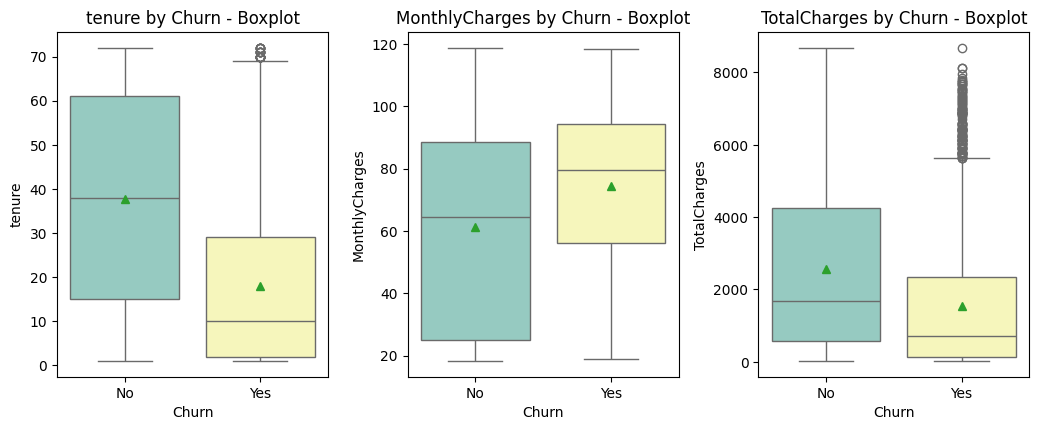

In [28]:
plot_numeric_distributions_by_target(data, 'Churn', numeric_data.columns)

In [29]:
from scipy.stats import mannwhitneyu
import numpy as np

def mann_whitney_analysis(data, numeric_cols, target_col, alpha=0.05):
    """
    Performs Mann-Whitney U test for numeric variables vs binary target.
    Calculates effect size using r of Rosenthal.
    
    Parameters:
    -----------
    data : DataFrame
        The dataset containing numeric and target variables
    numeric_cols : list
        List of numeric column names to test
    target_col : str
        Name of the binary target variable
    alpha : float
        Significance level (default 0.05)
    
    Returns:
    --------
    DataFrame with test results and effect sizes
    """
    results = []
        
    # Get unique values of target variable
    target_values = data[target_col].unique()
    if len(target_values) != 2:
        raise ValueError(f"Target variable must be binary. Found {len(target_values)} unique values.")
    
    group1_label, group2_label = target_values[0], target_values[1]
    
    for variable in numeric_cols:
        # Separate groups by target variable
        group1 = data[data[target_col] == group1_label][variable].dropna()
        group2 = data[data[target_col] == group2_label][variable].dropna()
        
        # Check if both groups have data
        if len(group1) == 0 or len(group2) == 0:
            print(f"⚠️  Variable {variable}: No hay datos suficientes")
            continue
        
        # Perform Mann-Whitney U test
        statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
        
        # Calculate effect size (r of Rosenthal)
        n1, n2 = len(group1), len(group2)
        n_total = n1 + n2
        
        # Calculate z-score approximation for effect size
        # For large samples, U approaches normal distribution
        mean_u = n1 * n2 / 2
        std_u = np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
        z_score = abs(statistic - mean_u) / std_u
        
        # r of Rosenthal = z / sqrt(n)
        r_rosenthal = z_score / np.sqrt(n_total)
        
        # Interpret effect size
        if r_rosenthal < 0.1:
            effect_size = "Muy pequeño"
        elif r_rosenthal < 0.3:
            effect_size = "Pequeño"
        elif r_rosenthal < 0.5:
            effect_size = "Mediano"
        else:
            effect_size = "Grande"
        
        # Determine significance
        is_significant = p_value < alpha
        
        # Calculate descriptive statistics
        median_group1 = group1.median()
        median_group2 = group2.median()
        mean_group1 = group1.mean()
        mean_group2 = group2.mean()
        
        # Store results
        result = {
            'Variable': variable,
            'U_Statistic': statistic,
            'p_value': p_value,
            'r_Rosenthal': r_rosenthal,
            'Effect_Size': effect_size,
            'Significant': 'Sí' if is_significant else 'No',
            f'Median_{group1_label}': median_group1,
            f'Median_{group2_label}': median_group2,
            f'Mean_{group1_label}': mean_group1,
            f'Mean_{group2_label}': mean_group2,
            f'n_{group1_label}': n1,
            f'n_{group2_label}': n2
        }
        results.append(result)
        
        # Print detailed results
        print(f"Variable: {variable}")
        print(f"   Mann-Whitney U = {statistic:.2f}")
        print(f"   p-valor = {p_value:.6f}")
        print(f"   r de Rosenthal = {r_rosenthal:.4f} ({effect_size})")
        print(f"   Significativo: {'Sí' if is_significant else 'No'}")
        print(f"   Medianas: {group1_label} = {median_group1:.2f}, {group2_label} = {median_group2:.2f}")
        print(f"   Medias: {group1_label} = {mean_group1:.2f}, {group2_label} = {mean_group2:.2f}")
        print(f"   Tamaños de muestra: {group1_label} = {n1}, {group2_label} = {n2}")
        
        # Interpretation
        if is_significant:
            if median_group2 > median_group1:
                direction = f"{group2_label} tiende a tener valores MÁS ALTOS"
            else:
                direction = f"{group1_label} tiende a tener valores MÁS ALTOS"
            print(f"Interpretación: {direction}")
        else:
            print(f"Interpretación: No hay diferencia significativa entre grupos")
        
        print("-" * 60)
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('r_Rosenthal', ascending=False)
    
    return results_df

In [30]:
# Execute Mann-Whitney analysis for numeric variables vs Churn
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
mann_whitney_results = mann_whitney_analysis(data, numeric_columns, 'Churn')

print("\nRESUMEN DE RESULTADOS:")
print("=" * 60)
display(mann_whitney_results[['Variable', 'U_Statistic', 'p_value', 'r_Rosenthal', 
                             'Effect_Size', 'Significant']].round(4))

Variable: tenure
   Mann-Whitney U = 7154668.00
   p-valor = 0.000000
   r de Rosenthal = 0.3694 (Mediano)
   Significativo: Sí
   Medianas: No = 38.00, Yes = 10.00
   Medias: No = 37.65, Yes = 17.98
   Tamaños de muestra: No = 5163, Yes = 1869
Interpretación: No tiende a tener valores MÁS ALTOS
------------------------------------------------------------
Variable: MonthlyCharges
   Mann-Whitney U = 3663498.50
   p-valor = 0.000000
   r de Rosenthal = 0.1842 (Pequeño)
   Significativo: Sí
   Medianas: No = 64.45, Yes = 79.65
   Medias: No = 61.31, Yes = 74.44
   Tamaños de muestra: No = 5163, Yes = 1869
Interpretación: Yes tiende a tener valores MÁS ALTOS
------------------------------------------------------------
Variable: TotalCharges
   Mann-Whitney U = 6288982.00
   p-valor = 0.000000
   r de Rosenthal = 0.2322 (Pequeño)
   Significativo: Sí
   Medianas: No = 1683.60, Yes = 703.55
   Medias: No = 2555.34, Yes = 1531.80
   Tamaños de muestra: No = 5163, Yes = 1869
Interpretación: N

,Variable,U_Statistic,p_value,r_Rosenthal,Effect_Size,Significant
0,tenure,7154668.0,0.0,0.3694,Mediano,Sí
2,TotalCharges,6288982.0,0.0,0.2322,Pequeño,Sí
1,MonthlyCharges,3663498.5,0.0,0.1842,Pequeño,Sí


- Las personas que se dan de baja tienden a tener menos meses con el servicio contratado con un tamaño de efecto mediano
- Las personas que que se dan de baja tienden a tener cargos mensuales más altos con un tamaño de efecto pequeño
- Las personas que se dan de baja tienden a tener cargos totales más bajos con un tamaño de efecto pequeño

## Justificación: Mann-Whitney U Test y Tamaño del Efecto

### **¿Por qué Mann-Whitney U en lugar de t-test?**
- **Distribuciones no normales**: Como las variables numéricas no siguen distribución normal
- **Prueba no paramétrica**: No asume normalidad, solo que las distribuciones tienen la misma forma
- **Equivalente robusto**: Es la versión no paramétrica del t-test de Student

### **Tamaño del Efecto (r de Rosenthal):**
- **r < 0.1**: Efecto muy pequeño (prácticamente insignificante)
- **0.1 ≤ r < 0.3**: Efecto pequeño
- **0.3 ≤ r < 0.5**: Efecto mediano
- **r ≥ 0.5**: Efecto grande

### **Interpretación de Resultados:**
- **p-valor < 0.05**: Diferencia estadísticamente significativa entre grupos
- **r de Rosenthal**: Magnitud práctica de la diferencia
- **Medianas**: Mejor medida de tendencia central para distribuciones asimétricas

### **Recomendaciones para Modelado:**
1. **Variables con r > 0.3 y significativas**: Alta prioridad para el modelo
2. **Variables con r entre 0.1-0.3 y significativas**: Considerar para el modelo
3. **Variables con r < 0.1**: Evaluar si incluir (poco poder discriminativo)

### **Nota Importante:**
Las diferencias en **medianas** son más interpretables que las medias cuando las distribuciones son asimétricas.

In [31]:
# Solo se trataron nulos
raw_data = data.copy()

## Entrenamiento Raw Data

In [32]:
binary_mappings = {
    'gender': {'Male': 1, 'Female': 0},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'Yes': 1, 'No': 0},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'Churn': {'Yes': 1, 'No': 0}
}

for col, mapping in binary_mappings.items():
    if col in raw_data.columns:
        raw_data[col] = raw_data[col].map(mapping)

In [33]:
raw_data.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [34]:
remaining_categorical = raw_data.select_dtypes(include=['object']).columns.tolist()
remaining_categorical.remove('customerID')  
df_encoded = pd.get_dummies(raw_data, columns=remaining_categorical, drop_first=True)

In [35]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  MultipleL

In [36]:
df_encoded.to_csv('churn_cleaned.csv', index=False)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [38]:
raw_model = pd.read_csv('churn_cleaned.csv')
X = raw_model.drop(columns=['customerID', 'Churn'])
y = raw_model['Churn']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

y_train_pred = lr.predict(X_train_scaled)
y_test_pred = lr.predict(X_test_scaled)

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



# FEATURE ENGINEERING

In [40]:
fe_data = raw_data.copy()

In [41]:
fe_data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64

In [42]:
fe_data['month_to_month'] = fe_data.apply(lambda x: 1 if x['Contract']=='Month-to-month' else 0, axis=1)

In [43]:
def num_internet_services(row):
    services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    count = 0
    for service in services:
        if row[service] == 'Yes':
            count += 1
    return count

fe_data['internet_based_services'] = fe_data.apply(num_internet_services, axis=1)

In [44]:
realizar_pruebas_chi2_churn(fe_data, ['month_to_month', 'internet_based_services'])

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN

 Variable: month_to_month
   Chi² = 1149.1043
   p-valor = 0.000000
   V de Cramer = 0.4042 (Moderado)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn              0     1
month_to_month            
0               93.2   6.8
1               57.3  42.7
--------------------------------------------------

 Variable: internet_based_services
   Chi² = 389.0442
   p-valor = 0.000000
   V de Cramer = 0.2352 (Débil)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn                       0     1
internet_based_services            
0                        78.5  21.5
1                        54.2  45.8
2                        64.2  35.8
3                        72.6  27.4
4                        77.6  22.4
5                        87.5  12.5
6                        94.7   5.3
--------------------------------------------------


,Variable,Chi2_Estadistico,p_valor,Grados_Libertad,V_Cramer,Tamaño_Efecto,Es_Significativo,Interpretacion
0,month_to_month,1149.104315,7.023468e-252,1,0.404241,Moderado,Sí,Rechazar H0 (hay asociación)
1,internet_based_services,389.044153,6.331529e-81,6,0.235212,Débil,Sí,Rechazar H0 (hay asociación)


In [55]:
def bin_internet_services(count):
    if count == 0:
        return 'none'
    elif count == 1:
        return 'one'
    elif count == 2:
        return 'two'
    else:
        return 'two or more'

In [56]:
fe_data['internet_service_bin'] = fe_data['internet_based_services'].apply(bin_internet_services)

In [57]:
realizar_pruebas_chi2_churn(fe_data, ['internet_based_services', 'internet_service_bin'])

ANÁLISIS CHI-CUADRADO: VARIABLES CATEGÓRICAS vs CHURN

 Variable: internet_based_services
   Chi² = 389.0442
   p-valor = 0.000000
   V de Cramer = 0.2352 (Débil)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn                       0     1
internet_based_services            
0                        78.5  21.5
1                        54.2  45.8
2                        64.2  35.8
3                        72.6  27.4
4                        77.6  22.4
5                        87.5  12.5
6                        94.7   5.3
--------------------------------------------------

 Variable: internet_service_bin
   Chi² = 307.8963
   p-valor = 0.000000
   V de Cramer = 0.2092 (Débil)
   Resultado: Rechazar H0 (hay asociación)
   Tabla de Contingencia:
Churn                    0     1
internet_service_bin            
none                  78.5  21.5
one                   54.2  45.8
two                   64.2  35.8
two or more           79.4  20.6
--------------------

,Variable,Chi2_Estadistico,p_valor,Grados_Libertad,V_Cramer,Tamaño_Efecto,Es_Significativo,Interpretacion
0,internet_based_services,389.044153,6.331529e-81,6,0.235212,Débil,Sí,Rechazar H0 (hay asociación)
1,internet_service_bin,307.896301,1.944078e-66,3,0.209249,Débil,Sí,Rechazar H0 (hay asociación)


# ENTRENAMIENTO